## Linear Regression
In this notebook, we'll implement the Linear Regression algorithm in order to fit the Iris dataset.

In [1]:
import pandas as pd
iris_df = pd.read_csv('./iris_csv.csv')
iris_df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


For now, we'll ignore the class and just try to fit a line to petal width using petal length

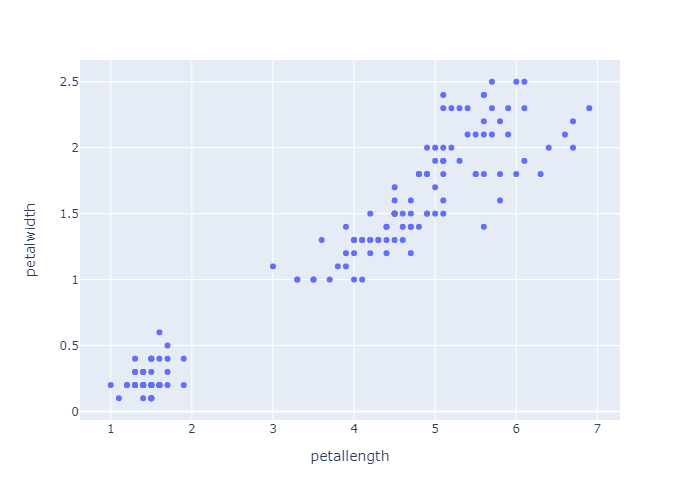

In [2]:
import plotly.express as px
plot = px.scatter(iris_df, x='petallength', y='petalwidth')
plot.show("notebook")

In [3]:
α = .0001 # Learning rate
Θ = [0] # Parameters
samples = iris_df[['petallength', 'petalwidth']]

def h_Θ(theta, features):
    # This is our model
    total = 0
    for ind in range(len(theta)):
        total += theta[ind] * [features][ind]
    return total

def J_Θ(samples): 
    # This is the loss function
    total = 0
    for ind, sample in samples.iterrows():
        total += (h_Θ(Θ, sample['petallength']) - sample['petalwidth'])**2
    return .5 * total

def dΘ_j_J_Θ(samples, j):
    # This is the derivative of our loss, for gradient descent
    total = 0
    for ind, sample in samples.iterrows():
        total += (h_Θ(Θ, sample['petallength']) - sample['petalwidth']) * sample['petallength']
    return total

for i in range(50):
    for j, _ in enumerate(Θ):
        print("Theta", Θ[j])
        print('Loss', J_Θ(samples))
        Θ[j] = Θ[j] - α * dΘ_j_J_Θ(samples, j)

Theta 0
Loss 151.15000000000006
Theta 0.086897
Loss 85.39134484852347
Theta 0.15134850489999999
Loss 49.216266468700475
Theta 0.19915218608433
Loss 29.31567250472923
Theta 0.2346081764187476
Loss 18.36797984292865
Theta 0.2609058844497851
Loss 12.345447307757784
Theta 0.2804108944964056
Loss 9.032338394520702
Theta 0.294877760447984
Loss 7.209734596721612
Theta 0.30560783492426974
Loss 6.207085818566591
Theta 0.3135663311633309
Loss 5.655509785668095
Theta 0.3194691478238425
Loss 5.352077390699372
Theta 0.323847266940944
Loss 5.185153498389134
Theta 0.3270945178900982
Loss 5.093325512036946
Theta 0.3295030039190858
Loss 5.042809202113949
Theta 0.331289378006786
Loss 5.015019225772207
Theta 0.33261433166763316
Loss 4.999731434833966
Theta 0.3335970497978835
Loss 4.991321332252468
Theta 0.3343259318350902
Loss 4.986694775955549
Theta 0.3348665436420864
Loss 4.984149619940963
Theta 0.33526751541933547
Loss 4.982749481539346
Theta 0.3355649161865211
Loss 4.981979238956001
Theta 0.335785498

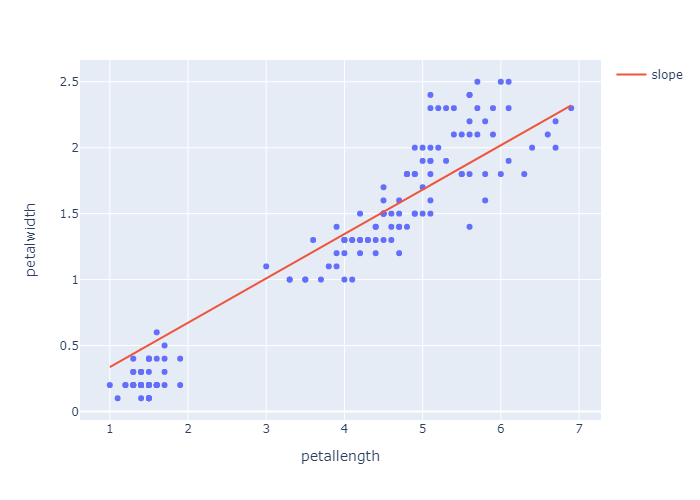

In [4]:
# Thanks to Dmitry.Balabka for the code snippet to plot a line on a scatter given a slope
# Source: https://community.plotly.com/t/plotly-python-how-to-add-a-line-with-given-slope-and-intercapt-to-a-given-x-y-plot/44970/6

import plotly.graph_objects as go

fig = px.scatter(samples, 'petallength', 'petalwidth')
fig.add_trace(
    go.Scatter(x=samples['petallength'], y=Θ[0]*samples['petallength'], name="slope", line_shape='linear')
)
fig.show("notebook")

Bada-bing bada-boom! Looks like that worked pretty well. Next I'll adapt this code to work with multiple features to predict the outcome.